# House Price Prediction with Ames Housing Dataset
This project aims to predict the sale price of houses using the Ames Housing dataset.  
We will explore the data, clean it, select relevant features, and train a regression model.
Here, I will practice scaling and regularization (Introducin parameter $\lambda$). 

The Ames Housing dataset contains 82 features describing various aspects of residential homes in Ames, Iowa.  
The target variable is **SalePrice**. Our goal is to build a model that can predict house prices based on relevant features.


In [298]:
#Importing main libraries to use in this notebook
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [292]:
#Calling data
general_data = pd.read_csv("data/AmesHousing.csv")
# Dividind the date into training_data & test_data
train_data, test_data  = train_test_split(general_data, test_size = 0.2, random_state = 42) 

## Basic explorarion of data set

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 381 to 860
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2344 non-null   int64  
 1   PID              2344 non-null   int64  
 2   MS SubClass      2344 non-null   int64  
 3   MS Zoning        2344 non-null   object 
 4   Lot Frontage     1951 non-null   float64
 5   Lot Area         2344 non-null   int64  
 6   Street           2344 non-null   object 
 7   Alley            162 non-null    object 
 8   Lot Shape        2344 non-null   object 
 9   Land Contour     2344 non-null   object 
 10  Utilities        2344 non-null   object 
 11  Lot Config       2344 non-null   object 
 12  Land Slope       2344 non-null   object 
 13  Neighborhood     2344 non-null   object 
 14  Condition 1      2344 non-null   object 
 15  Condition 2      2344 non-null   object 
 16  Bldg Type        2344 non-null   object 
 17  House Style      2

In [39]:
print(train_data.head())

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
381     382  527359050           20        RL          80.0     10400   Pave   
834     835  906475070           60        RL           NaN     28698   Pave   
1898   1899  534429030           90        RL          70.0      9842   Pave   
678     679  535451170           90        RL          60.0      7200   Pave   
700     701  902109130          190        RM          63.0      7627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
381    NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
834    NaN       IR2          Low  ...         0     NaN    NaN          NaN   
1898   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
678    NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
700    NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Typ

### Quick observations
- Some columns have missing values
- SalePrice seems sewed, we might log-transform later

### Checking correlation of all feattures

In [218]:
corr = train_data.corr(numeric_only = True)['SalePrice'].sort_values(ascending = False)
print(corr)

SalePrice          1.000000
Overall Qual       0.795298
Gr Liv Area        0.698315
Garage Cars        0.644304
Garage Area        0.633106
Total Bsmt SF      0.612256
1st Flr SF         0.607433
Year Built         0.545409
Full Bath          0.542053
Year Remod/Add     0.517653
Garage Yr Blt      0.516211
Mas Vnr Area       0.490912
TotRms AbvGrd      0.475455
Fireplaces         0.467501
BsmtFin SF 1       0.423906
Wood Deck SF       0.333045
Lot Frontage       0.328726
Open Porch SF      0.297722
Bsmt Full Bath     0.286515
Half Bath          0.285369
2nd Flr SF         0.278977
Lot Area           0.261336
Bsmt Unf SF        0.163571
Bedroom AbvGr      0.149269
Screen Porch       0.136936
Pool Area          0.079020
3Ssn Porch         0.034845
Mo Sold            0.030714
BsmtFin SF 2       0.027205
Low Qual Fin SF   -0.016025
Misc Val          -0.017729
Order             -0.020621
Bsmt Half Bath    -0.023675
Yr Sold           -0.037686
MS SubClass       -0.066351
Overall Cond      -0

In [109]:
# This will show you which features have missing values, and how many.

X_train.isna().sum().sort_values(ascending=False)


Garage Yr Blt     122
Garage Cars         1
Total Bsmt SF       1
Garage Area         1
Gr Liv Area         0
Overall Qual        0
1st Flr SF          0
Year Built          0
Full Bath           0
Year Remod/Add      0
dtype: int64

## Model Features ($X_i, Y$)
Using the correlation to 'SalePrice' I will choose the features that are  more than 50% correlated

In [254]:
# Obtaining the features with stron correlation (> 0.5)
target_corr = corr.abs()
selected_features = target_corr[target_corr > 0.5].drop('SalePrice').index.tolist()

print("Selected features:", selected_features)


Selected features: ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Year Remod/Add', 'Garage Yr Blt']


In [293]:
# Defining all features of our model
X_train = train_data[selected_features]
y_train = train_data['SalePrice']

X_test = test_data[selected_features]
y_test = test_data['SalePrice']


# Example: fill missing values with the column mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#Scaling the features: Not necessary in some cases, but is a good practice to have it just in case we need it.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed) 

### Visualiing the data

<Axes: >

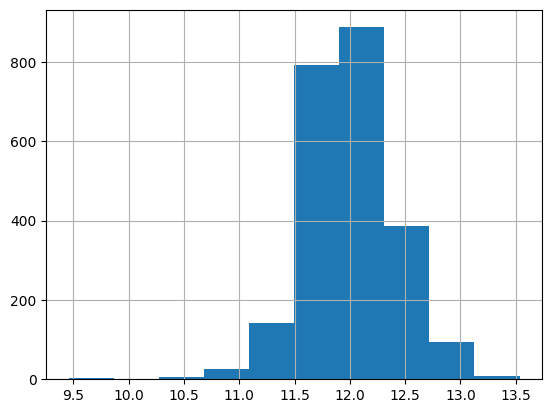

In [259]:
#Checking the distribution of the SalePRice for houses in this data set
np.log(train_data['SalePrice']).hist()

In [260]:
# COnvert the scaled data into a  a DataFrame 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df['SalePrice'] = y_train.reset_index(drop=True)


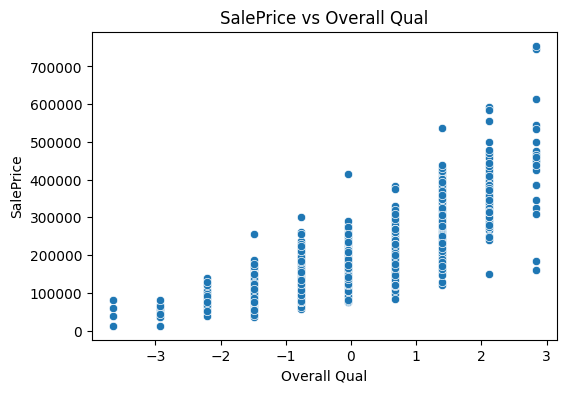

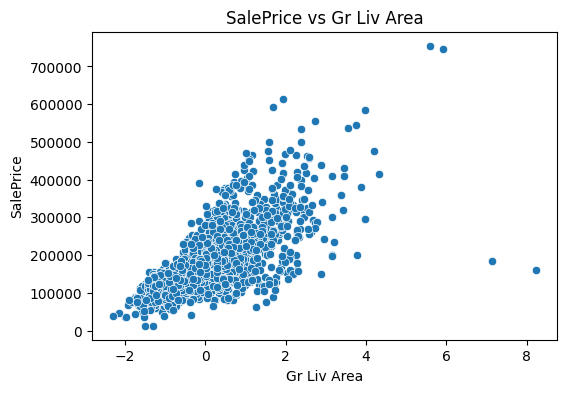

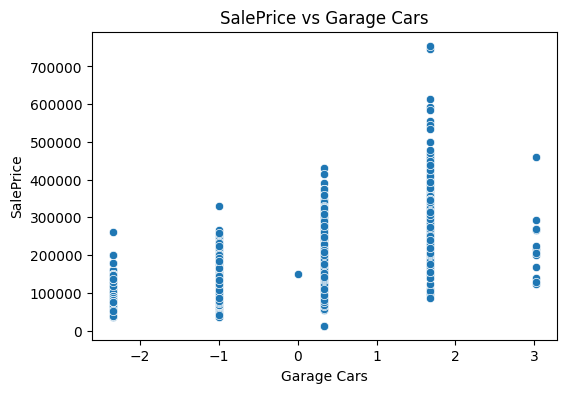

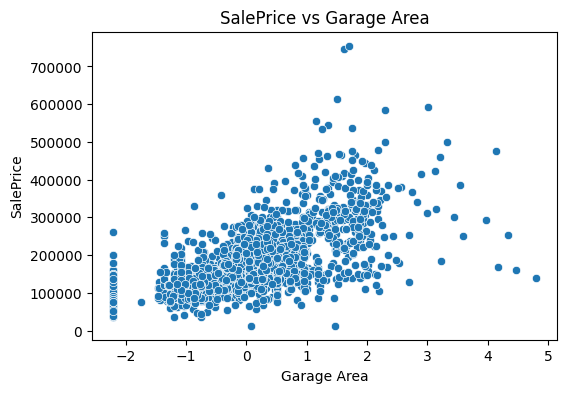

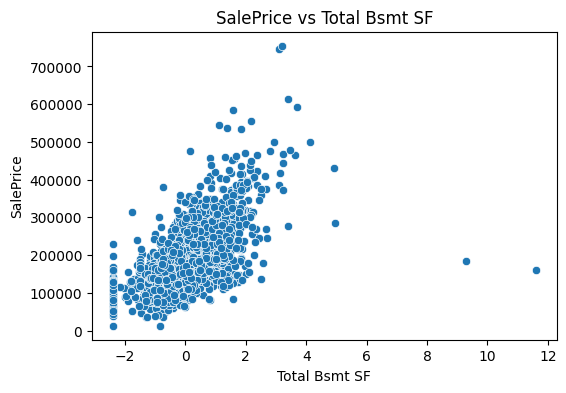

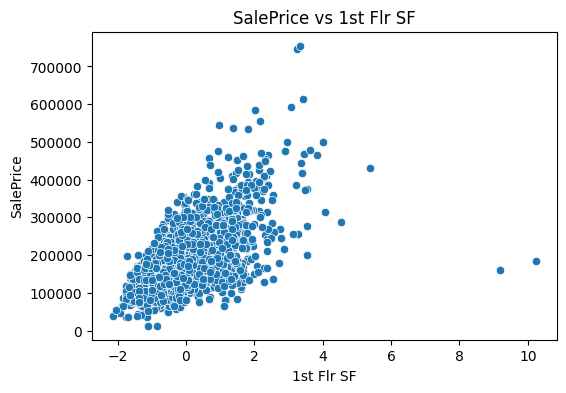

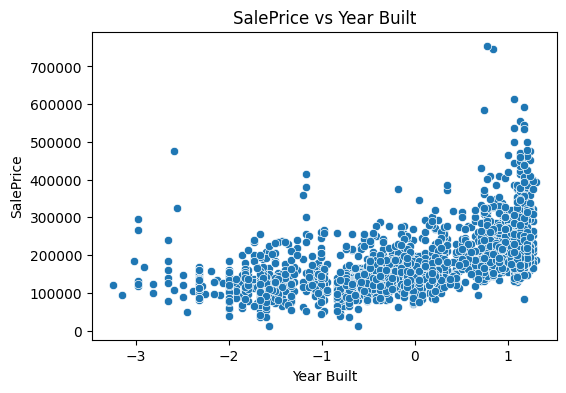

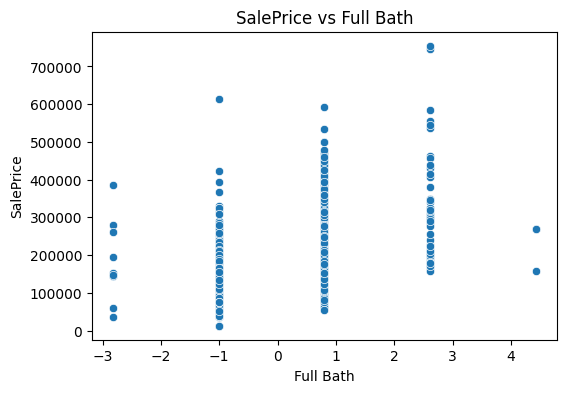

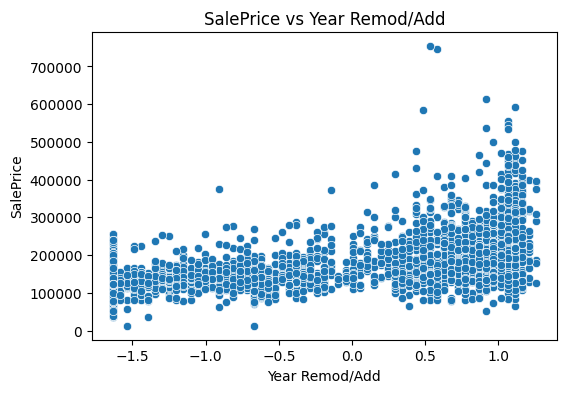

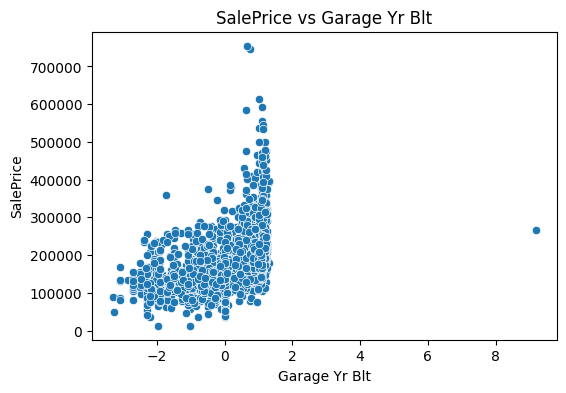

In [261]:
# Visualizing all features and its relation to 'SalePrice'

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x= feature, y='SalePrice', data=X_train_scaled_df)
    plt.title(f'SalePrice vs {feature}')
    plt.show()


Observations: For now, I will keet the full data set in order to train the model. I will compare to other more robust methods to compare differences.

# Model Training
Here, we now train our model and set up the best regularisation choice

In [262]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [296]:
###   Processing the data for Ridge

In [302]:
# Need to remove NANs from the features in the variables
# Separate numeric and categorical columns
num_cols = general_data[selected_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = general_data[selected_features].select_dtypes(include=['object', 'category']).columns.tolist()

# Pipeline for numeric columns: impute with mean and scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns: impute with most frequent and one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Prepare X and y
X = general_data[selected_features]
y = general_data['SalePrice']

# Split into train/test (better to split before fitting transformers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform train data only
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test data
X_test_processed = preprocessor.transform(X_test)

# Now X_train_processed and X_test_processed are ready for linear models with no NaNs or strings


## Trying Linear Regrersion

#### Checking the choice of the regularization parameter $\lambda$  & degree - comparing linear with Poly

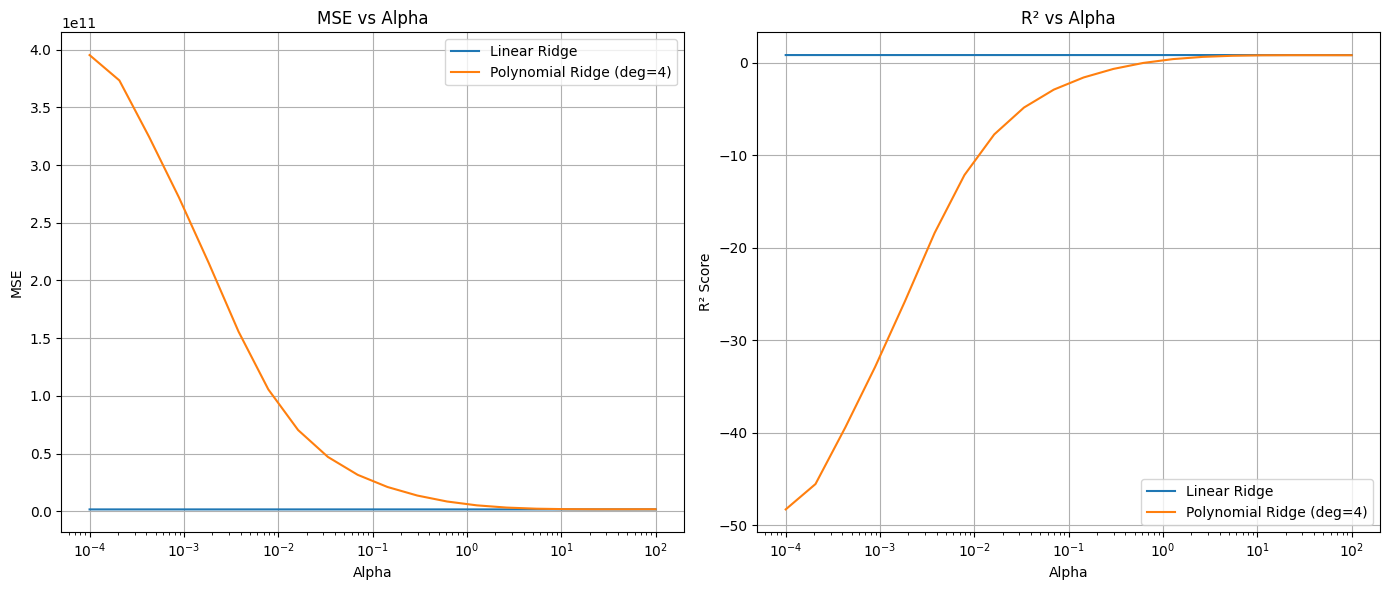

In [ ]:
alphas = np.logspace(-4, 2, 20)  # From 1e-4 to 100

mse_linear_list = []
r2_linear_list = []

mse_poly_list = []
r2_poly_list = []

for alpha in alphas:
    # Linear Ridge
    model_linear = Ridge(alpha=alpha)
    model_linear.fit(X_train_processed, y_train)
    y_pred_linear = model_linear.predict(X_test_processed)
    mse_linear_list.append(mean_squared_error(y_test, y_pred_linear))
    r2_linear_list.append(r2_score(y_test, y_pred_linear))

    # Polynomial Ridge (degree=4)
    pipeline_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=4, include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    pipeline_poly.fit(X_train_processed, y_train)
    y_pred_poly = pipeline_poly.predict(X_test_processed)
    mse_poly_list.append(mean_squared_error(y_test, y_pred_poly))
    r2_poly_list.append(r2_score(y_test, y_pred_poly))

# Plotting MSE
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(alphas, mse_linear_list, label='Linear Ridge')
plt.plot(alphas, mse_poly_list, label='Polynomial Ridge (deg=4)')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha')
plt.legend()
plt.grid(True)

# Plotting R²
plt.subplot(1,2,2)
plt.plot(alphas, r2_linear_list, label='Linear Ridge')
plt.plot(alphas, r2_poly_list, label='Polynomial Ridge (deg=4)')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² vs Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Observations: the polynomial model improves a lot with regularization and beats linear at reasonable alphas, it is better to use polynomial ridge with tuned alpha.

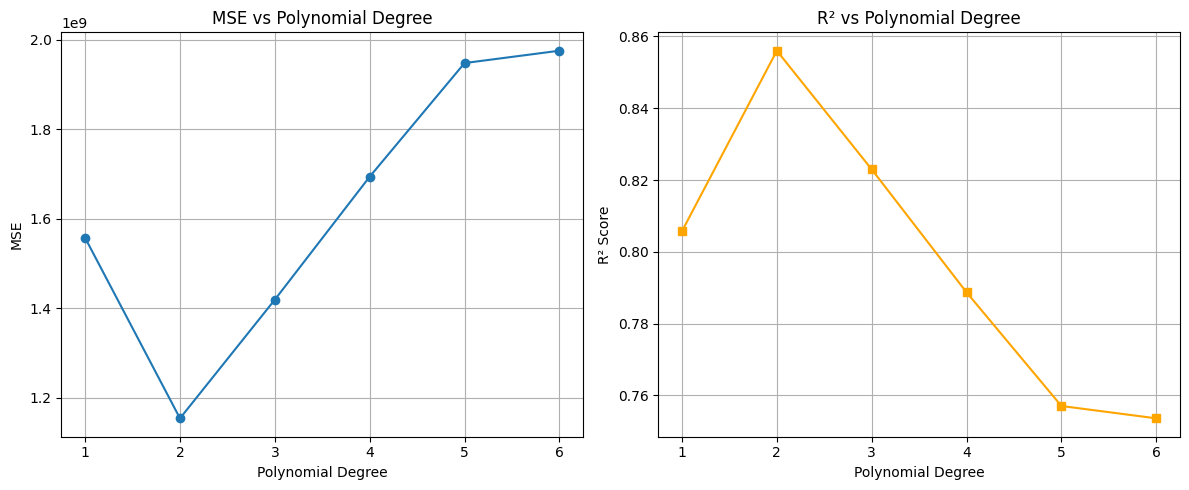

In [331]:


degrees = [1, 2, 3, 4, 5, 6]  # grados a probar
alpha = 100  # valor fijo para regularización (puedes ajustar luego)

mse_list = []
r2_list = []

for deg in degrees:
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    
    pipeline.fit(X_train_processed, y_train)
    y_pred = pipeline.predict(X_test_processed)
    
    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

# Graficar resultados
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(degrees, mse_list, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(degrees, r2_list, marker='s', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs Polynomial Degree')
plt.grid(True)

plt.tight_layout()
plt.show()


### Plotting results and predictions

In [377]:
#Polynomial 
best_alpha = 100
best_degree = 4
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=best_alpha))
])

pipeline_poly.fit(X_train_processed, y_train)  # PolynomialFeatures expects unscaled input, scaling done afterward

y_pred_poly = pipeline_poly.predict(X_test_processed)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Ridge (degree=4): MSE = {mse_poly:.2f}, R² = {r2_poly:.4f}")


Polynomial Ridge (degree=4): MSE = 1694039810.36, R² = 0.7887


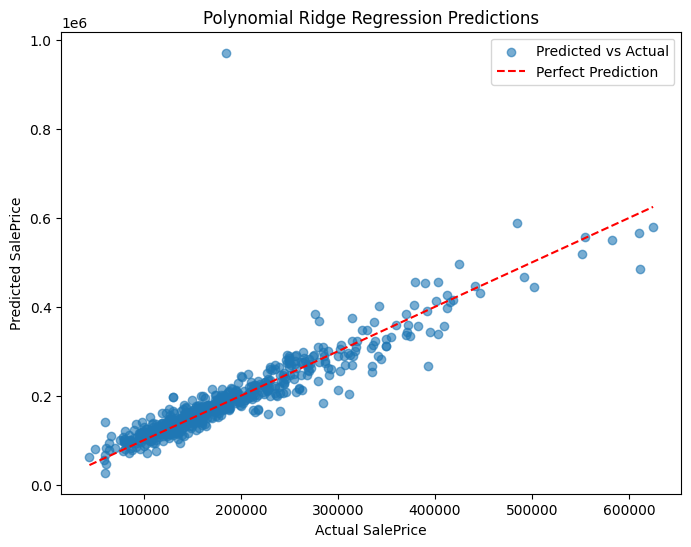

In [378]:
pipeline_poly.fit(X_train_processed, y_train)
y_pred_poly = pipeline_poly.predict(X_test_processed)

# Visualizar predicciones vs reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Polynomial Ridge Regression Predictions')
plt.legend()
plt.show()

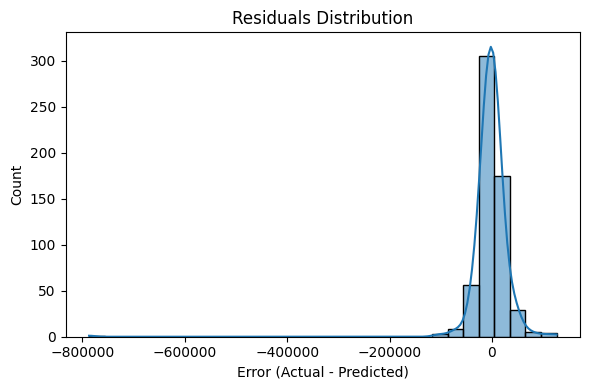

In [379]:
residuals = y_test - y_pred_poly

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()

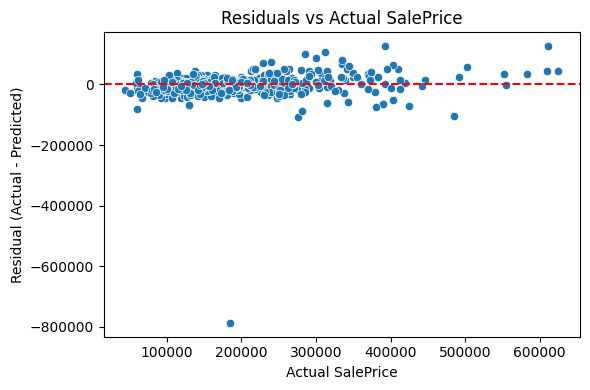

In [380]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual SalePrice")
plt.tight_layout()
plt.show()

### Checking our Model

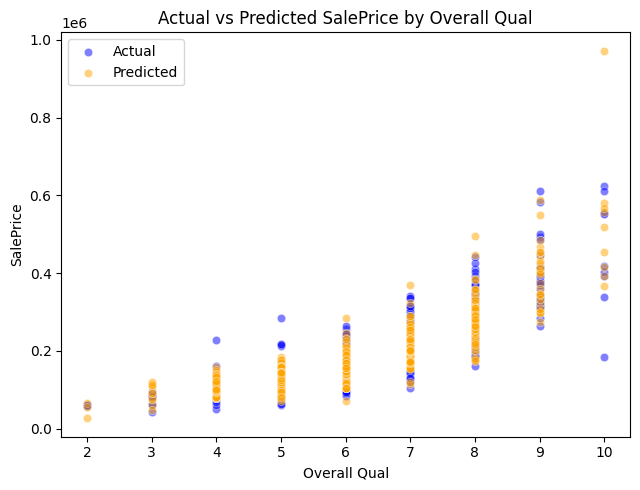

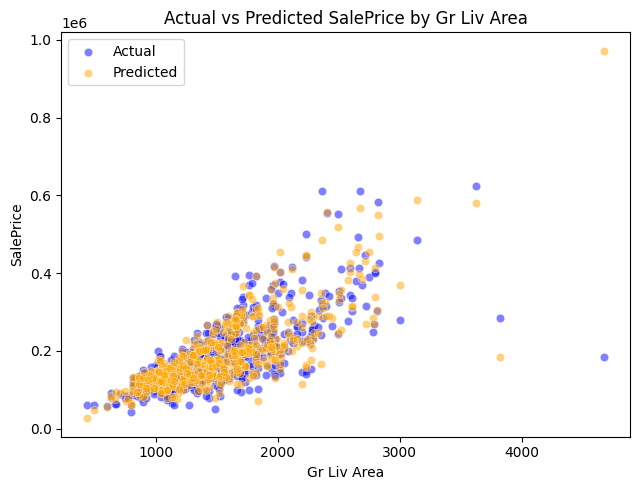

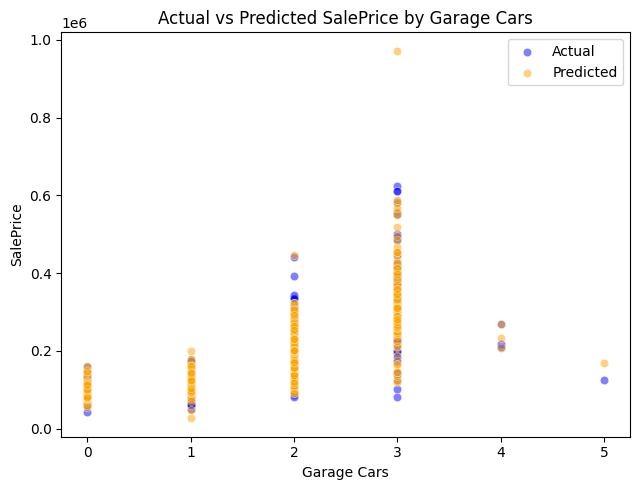

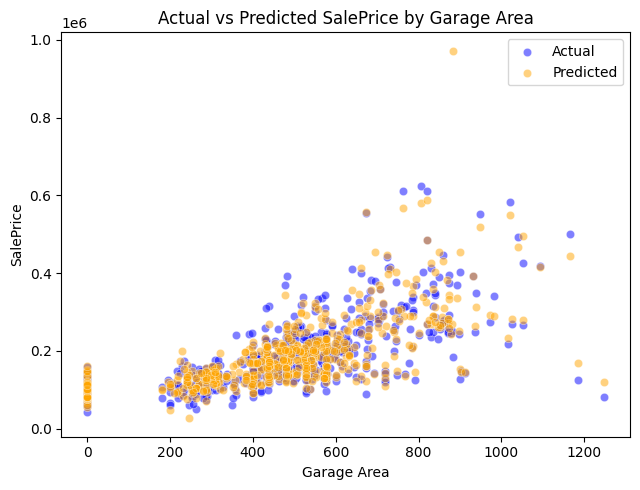

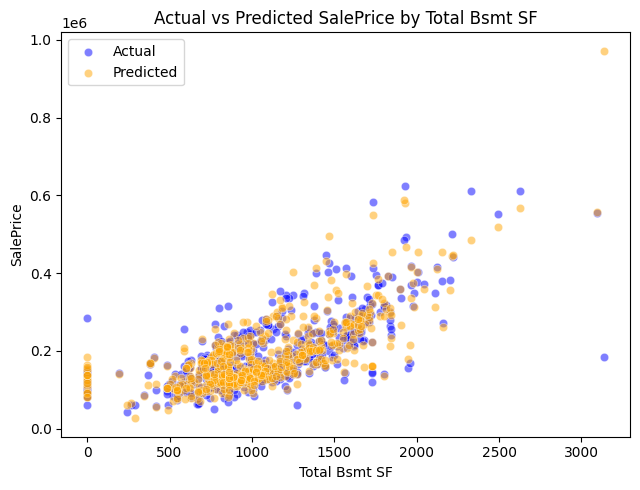

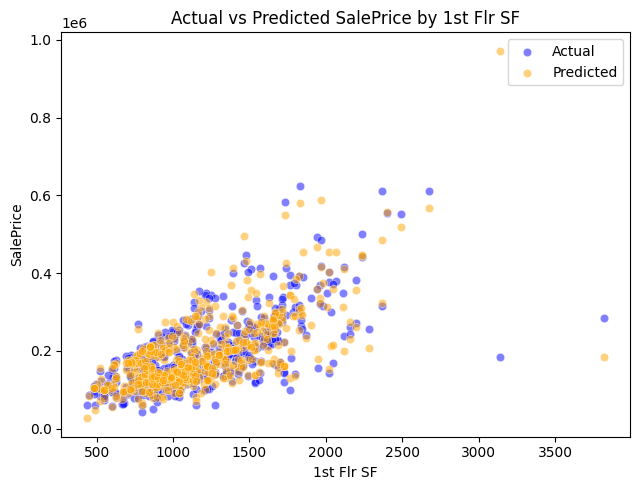

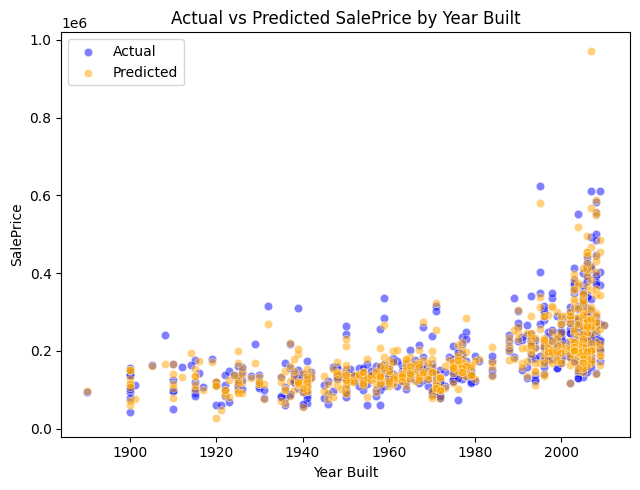

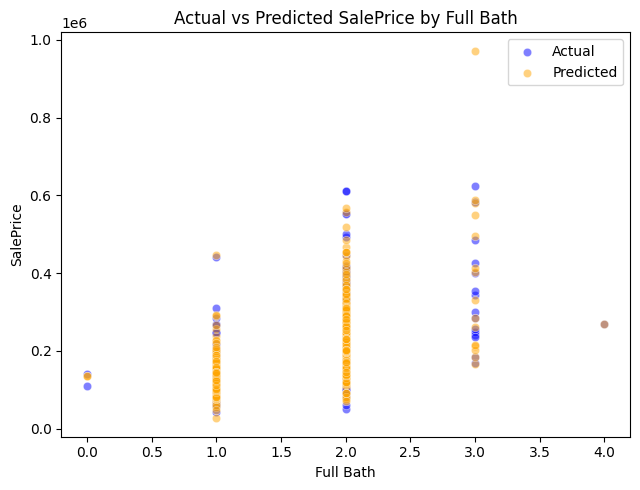

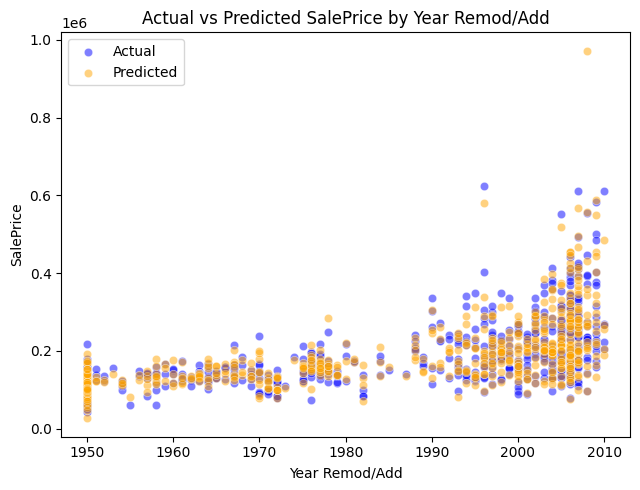

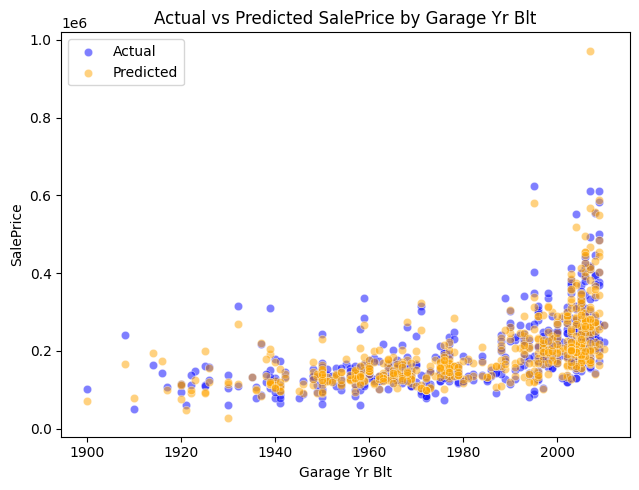

In [381]:
# Construct DataFrame for plotting with original feature names
plot_df = pd.DataFrame(X_test, columns=selected_features)
plot_df['Actual'] = y_test.values
plot_df['Predicted'] = y_pred_poly

# Plot Actual vs Predicted for each selected feature
for feature in selected_features:
    plt.figure(figsize=(6.5, 5))
    sns.scatterplot(x=plot_df[feature], y=plot_df['Actual'], label='Actual', color='blue', alpha=0.5)
    sns.scatterplot(x=plot_df[feature], y=plot_df['Predicted'], label='Predicted', color='orange', alpha=0.5)
    plt.title(f"Actual vs Predicted SalePrice by {feature}")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.legend()
    plt.tight_layout()
    plt.show()



In [383]:
plot_df.to_csv('predictions.csv', index=False)


## Trying RandomForestRegressor

In [130]:
from sklearn.ensemble import RandomForestRegressor


#### Testing the number of trees

In [132]:
n_trees = [10, 50, 100, 200, 300]
r2_scores = []
losses = []

for n in n_trees:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    losses.append(mse)


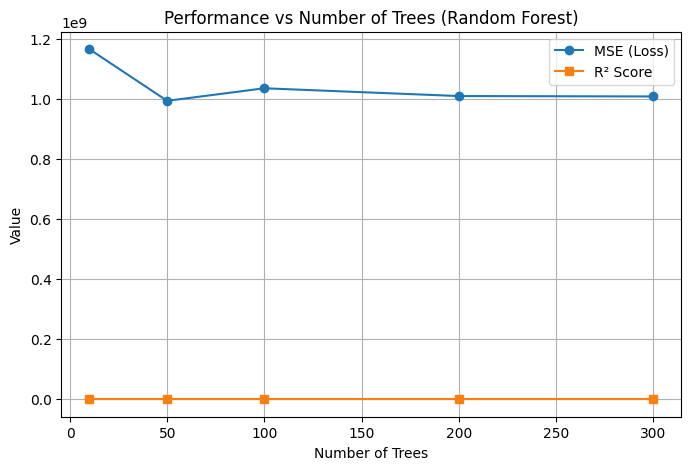

In [133]:
plt.figure(figsize=(8, 5))
plt.plot(n_trees, losses, marker='o', label='MSE (Loss)')
plt.plot(n_trees, r2_scores, marker='s', label='R² Score')
plt.xlabel('Number of Trees')
plt.ylabel('Value')
plt.title('Performance vs Number of Trees (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


Observations: Seems like keepin 100-200 trees is good enough for our model

#### Testing max_depth int he model

In [134]:


depths = [2, 4, 6, 8, 10, 15, 20, None]
r2_scores = []
losses = []

for depth in depths:
    rf = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    losses.append(mse)


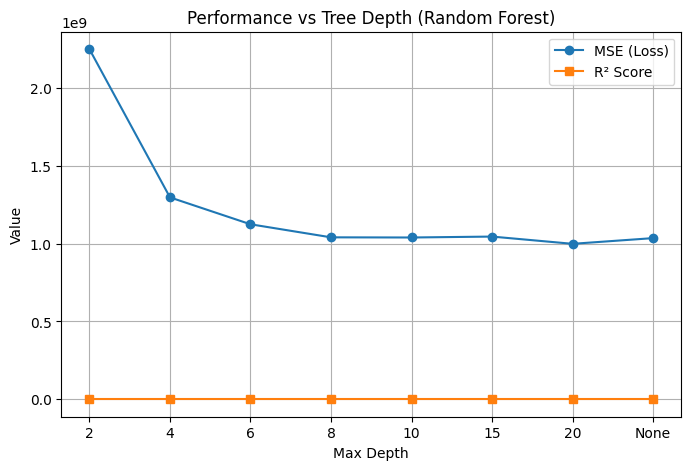

In [135]:
# Convert `None` to string for labeling
depth_labels = [str(d) if d is not None else "None" for d in depths]

plt.figure(figsize=(8, 5))
plt.plot(depth_labels, losses, marker='o', label='MSE (Loss)')
plt.plot(depth_labels, r2_scores, marker='s', label='R² Score')
plt.xlabel('Max Depth')
plt.ylabel('Value')
plt.title('Performance vs Tree Depth (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


In [139]:
# I will use raw data for this case
rf = RandomForestRegressor(n_estimators=200, max_depth=8,random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 32319.65
R² Score: 0.8697


### Stract Feature Importance

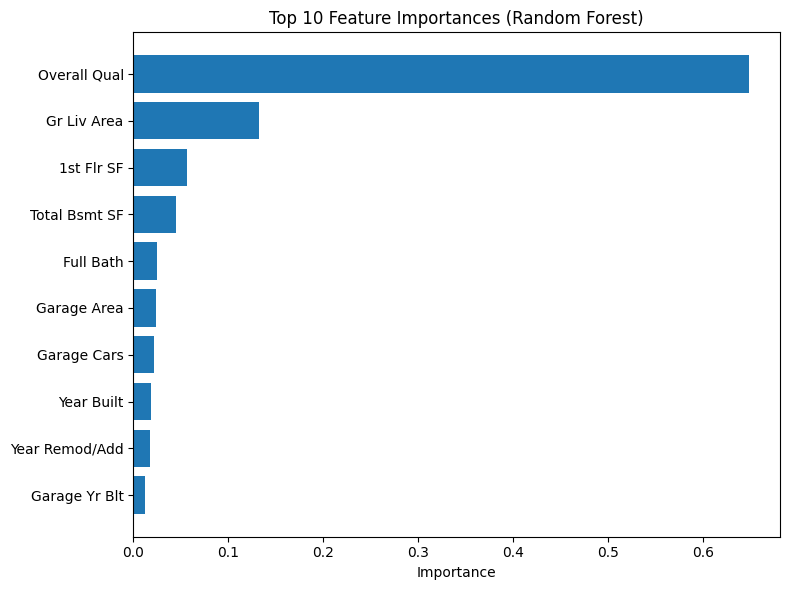

In [140]:


# Get importance values and match to column names
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort from most to least important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top N features
top_n = 10
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].head(top_n)[::-1],
         feature_importance_df['Importance'].head(top_n)[::-1])
plt.xlabel("Importance")
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


### Testing my model

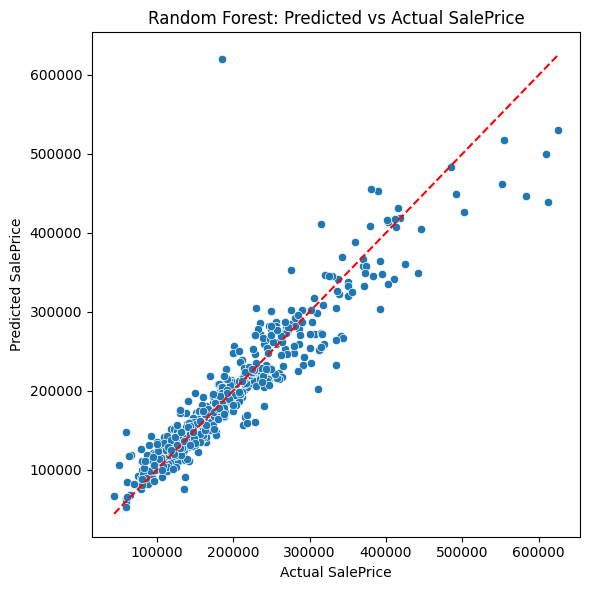

In [141]:


plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Predicted vs Actual SalePrice")
plt.tight_layout()
plt.show()


Observation: The model performs well for average-priced houses, but tends to underestimate high-end properties. This is a known limitation of Random Forests, which tend to regress extreme predictions toward the mean.

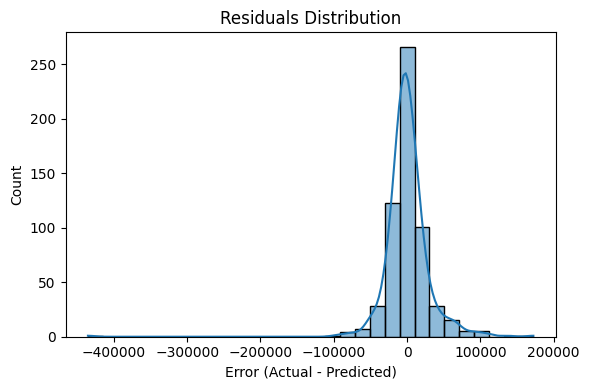

In [142]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()


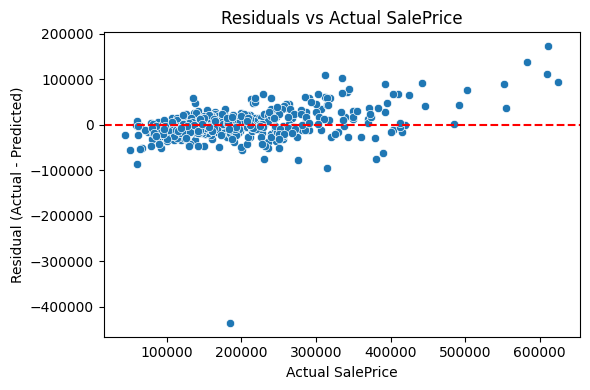

In [152]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual SalePrice")
plt.tight_layout()
plt.show()


#### Interpretation
Trend:

- For low to mid-priced houses, residuals are centered well around 0.

- For high-priced houses, residuals shift down — indicating the model underestimates their prices.

Pattern:

- There's a funnel shape: the spread increases with sale price.

- This is called heteroscedasticity, and it's common in regression with monetary values

### Checking the predictions of the model

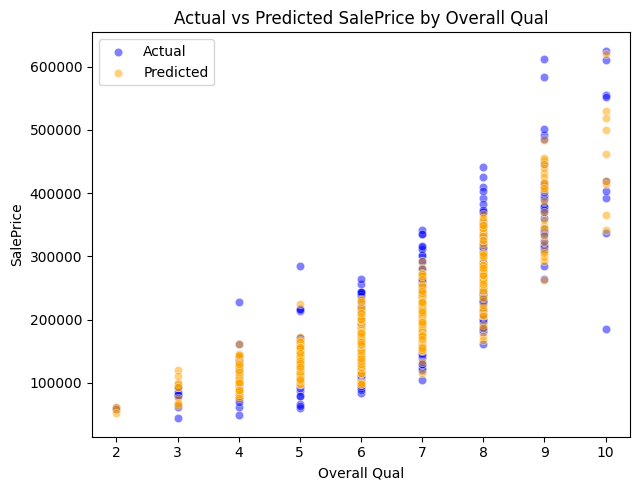

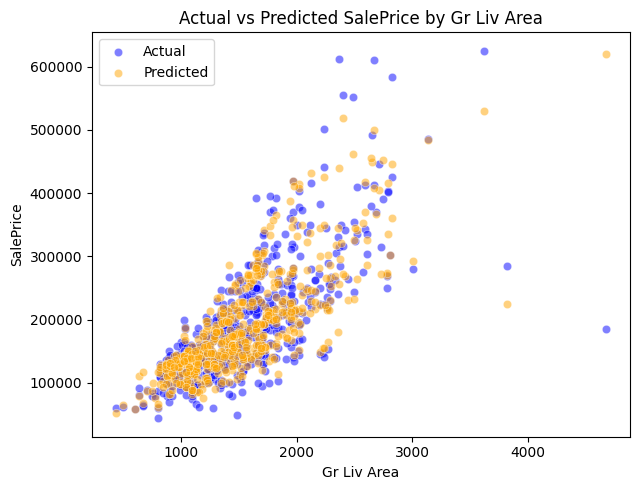

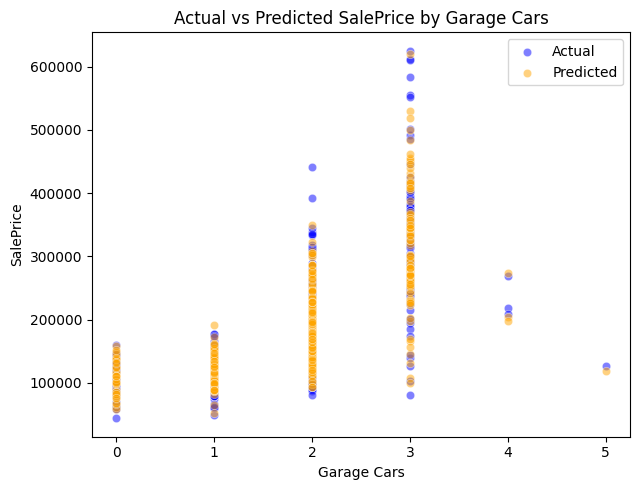

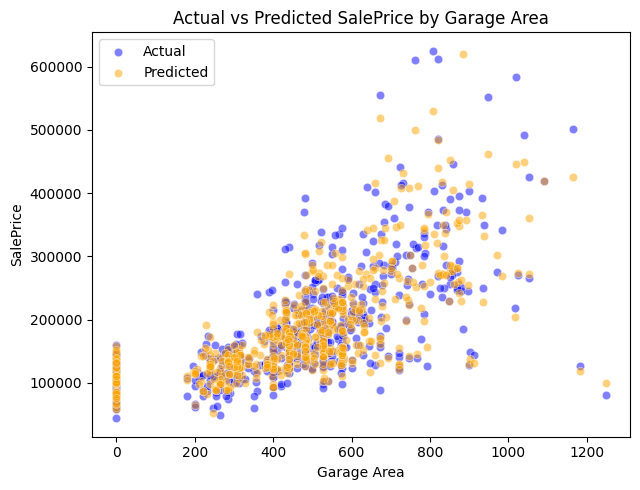

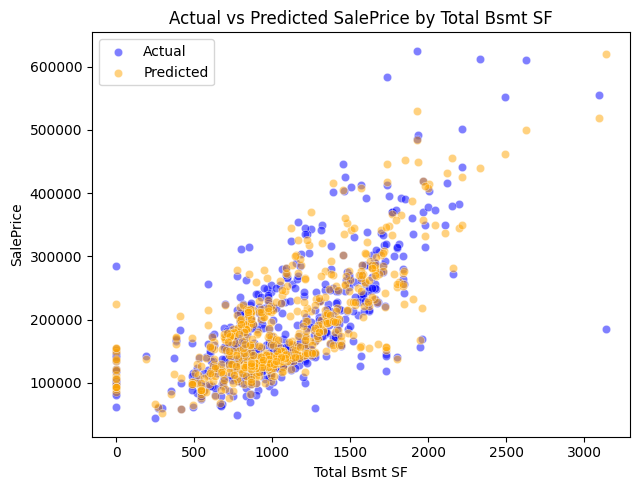

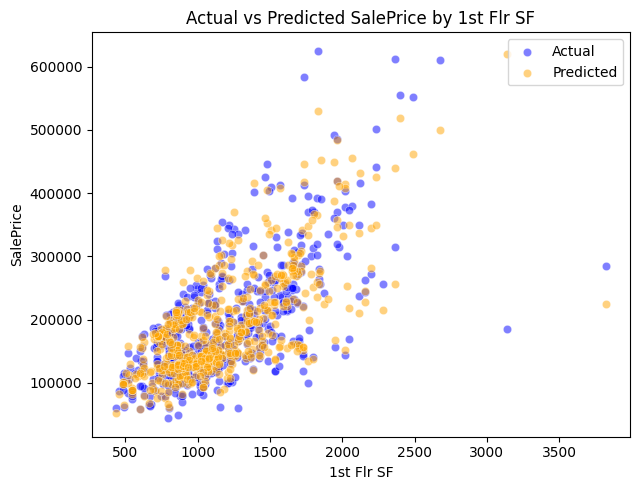

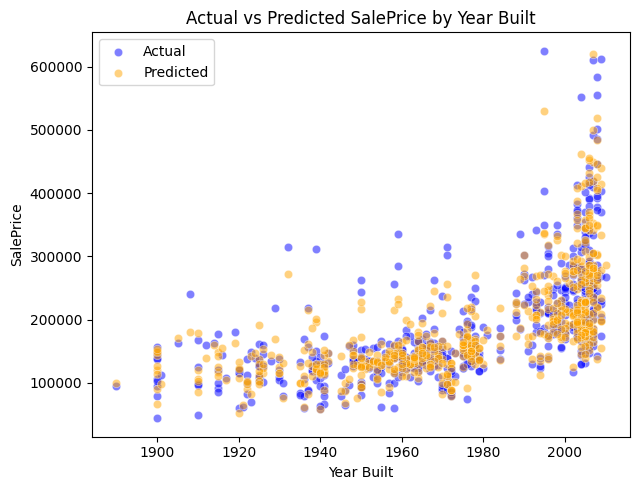

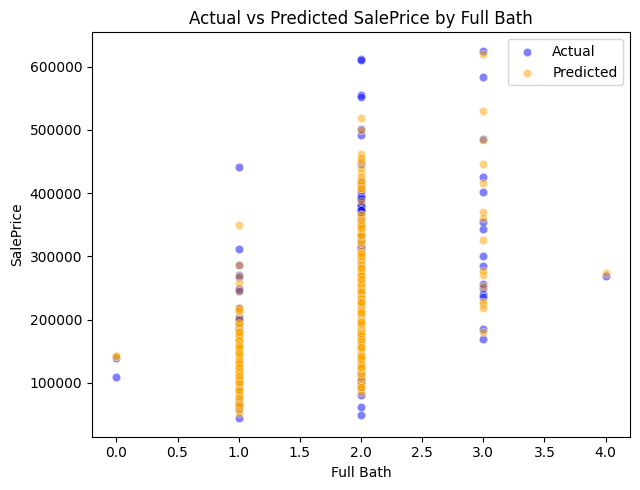

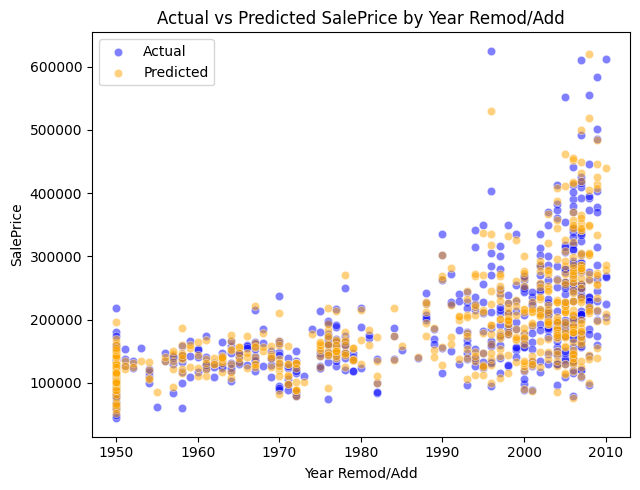

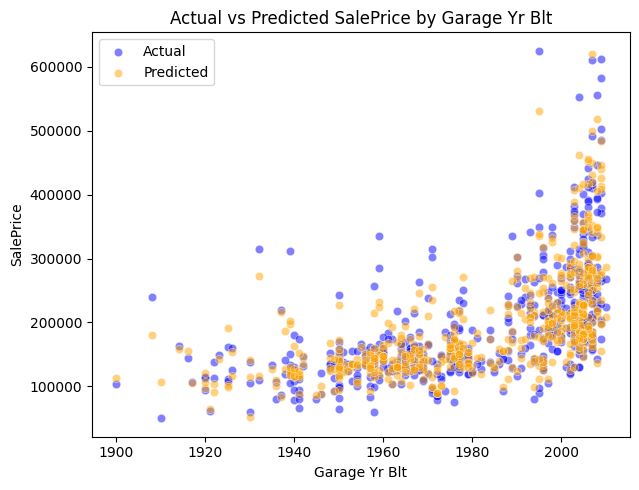

In [150]:

# Constructing the DataFrame el DataFrame
plot_df = pd.DataFrame(X_test, columns=X_train.columns)
plot_df['Actual'] = y_test.values
plot_df['Predicted'] = y_pred


for feature in selected_features:
    plt.figure(figsize=(6.5, 5))
    sns.scatterplot(x=plot_df[feature], y=plot_df['Actual'], label='Actual', color='blue', alpha=0.5)
    sns.scatterplot(x=plot_df[feature], y=plot_df['Predicted'], label='Predicted', color='orange', alpha=0.5)
    plt.title(f"Actual vs Predicted SalePrice by {feature}")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.legend()
    plt.tight_layout()
    plt.show()



The  model performs quite well overall, but:

- It struggles more as prices increase.

- Prediction variance increases with target value — which is expected in real estate.

## Log-transform the target

In [154]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [155]:
# Train the model with log-transformed target
rf_log = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
rf_log.fit(X_train, y_train_log)

# Predict on test set
y_pred_log = rf_log.predict(X_test)


In [156]:
# Transform predictions back to original scale
y_pred = np.expm1(y_pred_log)
# Do the same for comparison between actual values
y_test_original = np.expm1(y_test_log)


In [157]:
# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 32056.04
R² Score: 0.8718


### Plotting the result

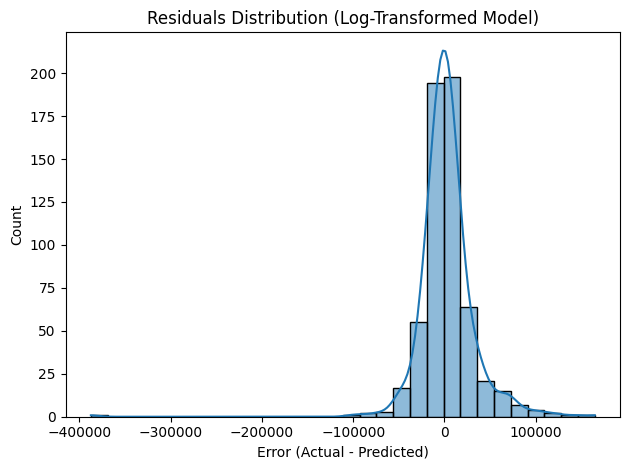

In [158]:
residuals = y_test_original - y_pred

# Histogram
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Log-Transformed Model)")
plt.xlabel("Error (Actual - Predicted)")
plt.tight_layout()
plt.show()


Observations: Improves the performance but it still has problems for large values of house prices.

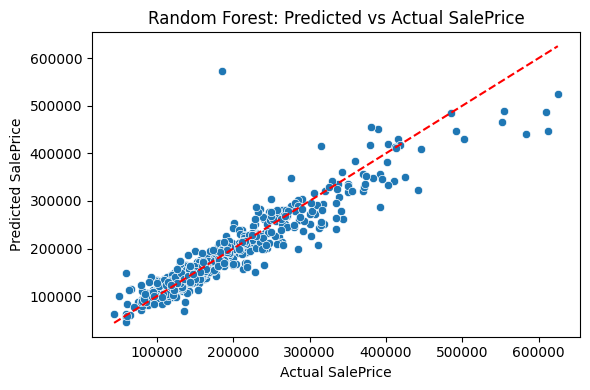

In [161]:

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_original, y=y_pred)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Predicted vs Actual SalePrice")
plt.tight_layout()
plt.show()

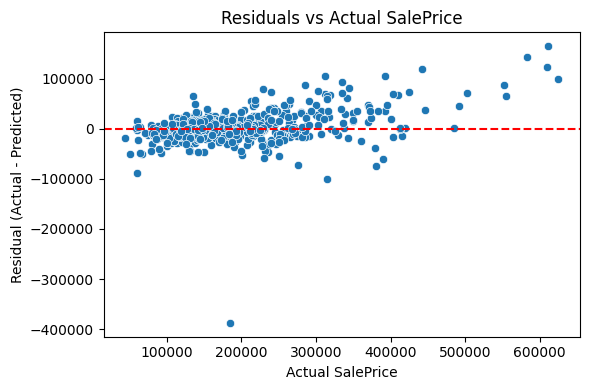

In [160]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_original, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual SalePrice")
plt.tight_layout()
plt.show()